In [1]:
%load_ext autoreload
%autoreload 2

In [55]:
from qiskit_metal import draw, Dict, designs, MetalGUI
from qiskit_metal.toolbox_metal import math_and_overrides
from qiskit_metal.qlibrary.core import QComponent
import numpy as np
from math import ceil

In [89]:
class TriCapacitor(QComponent):
    """
    Use this class as a template for your components - have fun

    Description:

    Options:
    """

    # Edit these to define your own template options for creation
    # Default drawing options
    default_options = Dict(
        cap_length='50um',
        cap_gap='2um',
        cpw_width='20um',
        cpw_length='10um',
        cpw_gap='12um',
        gap_to_gnd='12um',
        pos_x='0um',
        pos_y='0um',
        orientation='0',
        layer='1'
    )
    """Default drawing options"""

    # Name prefix of component, if user doesn't provide name
    component_metadata = Dict(short_name='capacitor',
                             _qgeometry_table_poly='True',
                             _qgeometry_table_path='True')
    """Component metadata"""

    def make(self):
        """Convert self.options into QGeometry."""

        p = self.parse_options()  # Parse the string options into numbers

        # EDIT HERE - Replace the following with your code
        # Create some raw geometry
        # Use autocompletion for the `draw.` module (use tab key)
        # making the base of the capacitor
        rect1 = draw.rectangle(p.cap_length, p.cap_length*1.7,0,0)
        rect2 = rect1
        rect3 = rect1

        rect2 = draw.rotate(rect2, 60)
        rect3 = draw.rotate(rect3, -60)

        pads = draw.union(rect1, rect2, rect3)
        pads = draw.rotate(pads, 30)

        # defining the gaps on the capacitor
        gap = draw.shapely.geometry.Point(0,0).buffer(p.cap_gap/3)
        rect4 = draw.rectangle(p.cap_gap, 1.1*p.cap_length, 0, (1.1*p.cap_length)/2)
        rect5 = rect4
        rect6 = rect4
        rect5 = draw.rotate(rect5,120,origin=(0,0))
        rect6 = draw.rotate(rect6,-120, origin=(0,0))
        gap = draw.union(gap,rect4,rect5,rect6)
        pads = draw.subtract(pads, gap)

        # defining cpw gates

        # cpw1 = draw.rectangle(p.cpw_width,p.cpw_length,0,-p.cpw_length/2-(p.cap_length-p.cpw_width/(2*np.sqrt(3))))
        # cpw2 = cpw1
        # cpw3 = cpw1
        # cpw2 = draw.rotate(cpw2,120,origin=(0,0))
        # cpw3 = draw.rotate(cpw3,-120,origin=(0,0))

        cpw1 = draw.shapely.geometry.LineString([[0,-(p.cap_length-p.cpw_width/(2*1.2))],[0,-(p.cap_length-p.cpw_width/(2*1.2))-p.cpw_length]])
        cpw2 = cpw1
        cpw3 = cpw1
        cpw2 = draw.rotate(cpw2,120,origin=(0,0))
        cpw3 = draw.rotate(cpw3,-120,origin=(0,0))

        to_cut1 = draw.rectangle(p.cpw_width,2*p.cpw_width/(2*1.7),0,-(2*p.cpw_width/(2*1.7))/2-(p.cap_length-p.cpw_width/(2*1.2)))
        to_cut2 = to_cut1
        to_cut3 = to_cut1
        to_cut2 = draw.rotate(to_cut2,120,origin=(0,0))
        to_cut3 = draw.rotate(to_cut3,-120,origin=(0,0))
        pads = draw.subtract(pads,to_cut1)
        pads = draw.subtract(pads,to_cut2)
        pads = draw.subtract(pads,to_cut3)

        # making the gap to ground of the capacitor
        rect7 = draw.rectangle(p.cap_length+2*p.gap_to_gnd/np.sqrt(3), (p.cap_length+2*p.gap_to_gnd/np.sqrt(3))*np.sqrt(3),0,0)
        rect8 = rect7
        rect9 = rect7

        rect8 = draw.rotate(rect8, 60)
        rect9 = draw.rotate(rect9, -60)

        cap_etch = draw.union(rect7, rect8, rect9)
        cap_etch = draw.rotate(cap_etch, 30)

        # making the gap to ground of the cpw
        # cpw1_etch = draw.rectangle(p.cpw_width+2*p.cpw_gap,p.cpw_length,0,-p.cpw_length/2-(p.cap_length-p.cpw_width/(2*np.sqrt(3))))
        # cpw2_etch = cpw1_etch
        # cpw3_etch = cpw1_etch
        
        # cpw2_etch = draw.rotate(cpw2_etch,120,origin=(0,0))
        # cpw3_etch = draw.rotate(cpw3_etch,-120,origin=(0,0))

        # Rotating and translating
        geom_list = [pads,cpw1,cpw2,cpw3,cap_etch]
        geom_list = draw.rotate(geom_list, p.orientation, origin=(0,0))
        geom_list = draw.translate(geom_list, p.pos_x, p.pos_y)
        [pads,cpw1,cpw2,cpw3,cap_etch] = geom_list

        self.add_qgeometry('poly', {'pads':pads}, layer=p.layer)
        self.add_qgeometry('poly', {'cap_etch':cap_etch}, layer=p.layer, subtract=True)
        self.add_qgeometry('path', {'cpw1':cpw1, 'cpw2':cpw2, 'cpw3':cpw3}, layer=p.layer, width = p.cpw_width)
        self.add_qgeometry('path', {'cpw1_etch':cpw1, 'cpw2_etch':cpw2, 'cpw3_etch':cpw3}, layer=p.layer, width = p.cpw_width+2*p.cpw_gap, subtract=True)

        self.add_pin('pin_1', cpw1.coords, width = p.cpw_width, gap = p.cpw_gap, input_as_norm=True)
        self.add_pin('pin_2', cpw2.coords, width = p.cpw_width, gap = p.cpw_gap, input_as_norm=True)
        self.add_pin('pin_3', cpw3.coords, width = p.cpw_width, gap = p.cpw_gap, input_as_norm=True)

               

# Testing each step of the construction

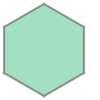

In [48]:
rect1 = draw.rectangle(10,1.7*10,0,0) # aqui
rect2 = rect1
rect3 = rect1

rect2 = draw.rotate(rect2, 60)
rect3 = draw.rotate(rect3, -60)

pads = draw.union(rect1,rect2,rect3)
pads = draw.rotate(pads, 30)
pads

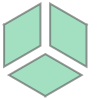

In [49]:
center = draw.shapely.geometry.Point(0,0).buffer(0.5) # aqui
rect4 = draw.rectangle(2, 10+10*0.1, 0, (10+10*0.1)/2) # aqui
rect5 = rect4
rect6 = rect4
rect5 = draw.rotate(rect5,120,origin=(0,0))
rect6 = draw.rotate(rect6,-120,origin=(0,0))
gap = draw.union(center,rect4,rect5,rect6)

gap
pads = draw.subtract(pads,gap)
pads


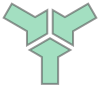

In [50]:
l = 10
x = 6
y = 10
gnd = 2

cpw1 = draw.rectangle(x,y,0,-y/2-(l-x/(2*1.5))) # aqui
cpw2 = cpw1
cpw3 = cpw1
cpw2 = draw.rotate(cpw2,120,origin=(0,0))
cpw3 = draw.rotate(cpw3,-120,origin=(0,0))

pads = draw.union(pads,cpw1,cpw2,cpw3)   

pads


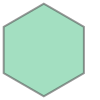

In [12]:
etch1 = draw.rectangle(l+2*gnd/np.sqrt(3),(l+2*gnd/np.sqrt(3))*np.sqrt(3),0,0)
etch2 = etch1
etch3 = etch1

etch2 = draw.rotate(etch2,60)
etch3 = draw.rotate(etch3,-60)

cap_etch = draw.union(etch1,etch2,etch3)
cap_etch = draw.rotate(cap_etch, 30)

cap_etch

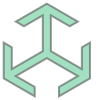

In [13]:
sub = draw.subtract(cap_etch, pads)
sub

In [10]:
print(np.sqrt(3))

1.7320508075688772


In [54]:
testedesign = designs.DesignPlanar(overwrite_enabled=True)

In [56]:
gui = MetalGUI(testedesign)

In [90]:
cap = TriCapacitor(testedesign,'cap')

gui.rebuild()
gui.zoom_on_components(['cap'])

In [91]:
from qiskit_metal import renderers

testedesign.renderers.gds.export_to_gds('cap3ways.gds')

04:54PM 52s WARNING [_import_junctions_to_one_cell]: Not able to find file:"../resources/Fake_Junctions.GDS".  Not used to replace junction. Checked directory:"d:\Users\e196203\Desktop\Git Hub\Dodecahedral-lattice\resources".


1

In [70]:
ansys = testedesign.renderers.q3d

In [71]:
ansys.connect_ansys()

INFO 04:34PM [connect_project]: Connecting to Ansys Desktop API...
INFO 04:34PM [load_ansys_project]: 	Opened Ansys App
INFO 04:34PM [load_ansys_project]: 	Opened Ansys Desktop v2023.1.0
INFO 04:34PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/Users/e196203/Documents/Ansoft/
	Project:   Project9
INFO 04:34PM [connect_design]: 	Opened active design
	Design:    3ways_capacitor [Solution type: Q3D]
INFO 04:34PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 04:34PM [connect]: 	Connected to project "Project9" and design "3ways_capacitor" 😀 



In [92]:
ansys.clean_active_design()
ansys.render_design()

In [93]:
ansys.disconnect_ansys()

In [94]:
gui.main_window.close()

True